# Project 3: Modeling the Titanic with Logistic Regression
### Montgomery College, DATA201 Fall 2019  [Lucy Murray](lmurra38@montgomerycollege.edu)

This dataset comes from Kaggle's "Titanic: Machine Learning from Disaster" competition. It contains three datasets relating to the infamous Titanic shipwreck on April 15th, 1912. Unfortunately, 1502 out of 2224 passengers and crew onboard died in this tragedy. The goal of Kaggle's competition is to use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

The dataset compiled by Kaggle provides information on the survivalship of Titanic passengers, summarized according to economic status, sex, age and survival. I will create a logistic regression model and then test its accuracy. This project follows code and concepts contained in ["Predicting the Survival of Titanic Passengers" by Niklas Donges
](https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8), ["Logistic Regression with Python using Titanic data" by Diego Lescano](https://datascienceplus.com/logistic-regression-with-python-using-titanic-data/), and [this DataCamp tutorial on logistic regression](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python).

I am in interested in answering the following question:
* How accurate of a model can I build to predict the survivalship of Titanic passengers?
* What features can be utilized to predict whether or not a passenger can survive?
* How good is our model for the logistic regression?

### Importing the Data

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification

### Getting the Data

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

### Data Dictionary

<table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition</th>
      <th>Key</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>survival</td>
      <td>Survival</td>
      <td>0 = No, 1 = Yes</td>
    </tr>
    <tr>
      <td>pclass</td>
      <td>Ticket class</td>
      <td>1 = 1st, 2 = 2nd, 3 = 3rd</td> 
    </tr>
    <tr>
      <td>sex</td>
      <td>Sex</td>
      <td></td> 
    </tr>
    <tr>
      <td>Age</td>
      <td>Age in years</td>
      <td></td> 
    </tr>
    <tr>
      <td>sibsp</td>
      <td># of siblings / spouses aboard the Titanic</td>
      <td></td> 
    </tr>
    <tr>
      <td>parch</td>
      <td># of parents / children aboard the Titanic</td>
      <td></td> 
    </tr>
    <tr>
      <td>ticket</td>
      <td>Ticket number</td>
      <td></td> 
    </tr>
    <tr>
      <td>fare</td>
      <td>Passenger fare</td>
      <td></td> 
    </tr>
    <tr>
      <td>cabin</td>
      <td>Cabin number</td>
      <td></td> 
    </tr>
    <tr>
      <td>embarked</td>
      <td>Port of Embarkation</td>
      <td>C = Cherbourg, Q = Queenstown, S = Southampton</td> 
    </tr>
    
    
  </tbody>
</table>

### Looking at the test-set

In [3]:
# Looking at the test data set
test_df.info()
test_df.describe()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Looking at the training-set:

In [4]:
# Observing the general structure of the dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


The training-set has 891 examples, 11 features, and the target variable is whether or not the passenger survived.

In [5]:
# Listing a summarization of the features
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the table of, I learned that 38 percent out of the training-set survived the titanic, the age range is from 0.4 to 80, and that age has missing features with only 714 values.

In [6]:
# Observing the head of the dataframe 
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The head of the data shows that several features need to be converted into numeric ones and that some features are missing values. Furthermore, some features have widely different ranges that will need to be converted into roughly the same scale.

# Preparing and Wrangling with Pandas and Numpy

I decided to prepare and wrangle my data with the pandas and numpy packages. First, I checked missing values and found that the Cabin, Age, and Embarked features have missing values. Because the Cabin feature had 77.1% missing, I decided to remove it entirely. I generated random numbers based on the mean of the Age value to make up for the 19.9% mising values. And finally, for Embarked I decided to fill the missing 2 values with the most common one.

### Overview of Missing Values

In [7]:
# Checking the missing values
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


**Cabin:** Since 77% of the cabin feature is missing, it may be easiest to drop it from the dataset.

In [8]:
# Dropping the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

**Age:** I decided to create an array with random numbers based on the mean age value in regards to the standard deviation and is_null from both the train and test datasets to fill in the missing values for age.

In [9]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
    
# Confirm there are now no missing values
train_df["Age"].isnull().sum()

0

**Embarked:** Since Embarked only has 2 missing values, I decided to fill these with the most common value of S.

In [10]:
# Checking the most common value
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [11]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

# Exploratory Data Analysis

I am now going the Matplotlib and Seaborn packages to visualize the data. I want to look at the features I am interested in, and create observations to determine how to best conduct the logistic regression.

### Age and Sex

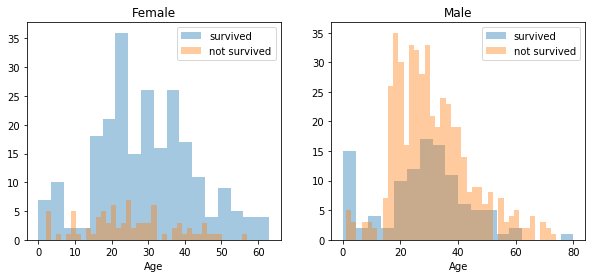

In [12]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

**Observations:**
* Men have a high probability of survival when they are between 18 and 30 years old.
* Women had a high probability of survival between 14 and 40.
* Men have a low probability of survival between the age of 5 and 18.
* Infants also have a little bit higher probability of survival for both genders.
* Overall, it seemed that females had a higher probability of survival than males. 

### Embarked, Pclass, and Sex

C:\Users\murrayl\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


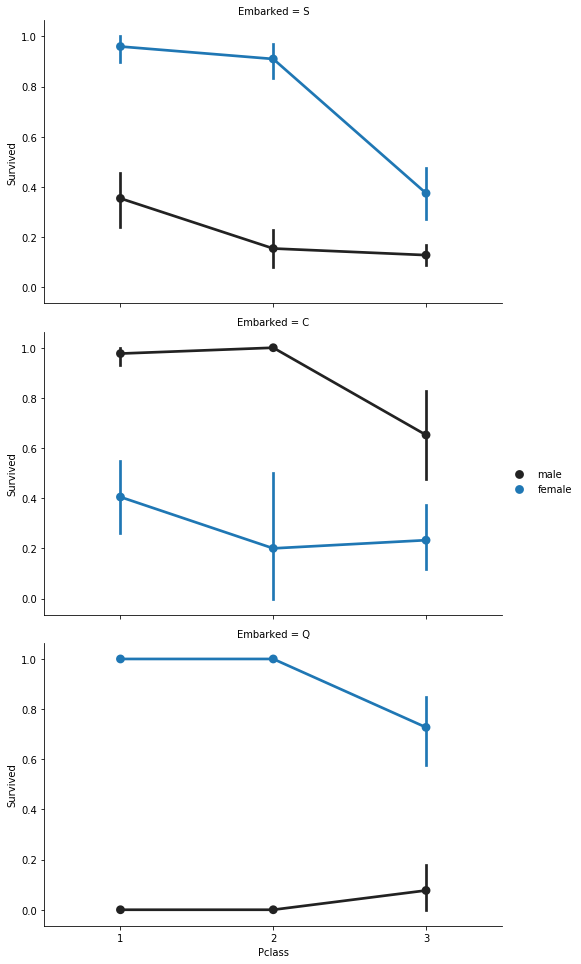

In [13]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

**Observations:**
* Women that embarked out of port S and Q had a high chance of survival, but a low chance out of port C.
* Inversely, men that embarked out of port S and Q had a low chance of survival, but a high chance out of port C.
* Pclass seems to also somewhat be correlated with survival, especially for women.

### Pclass

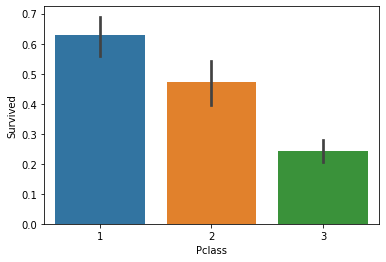

In [14]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

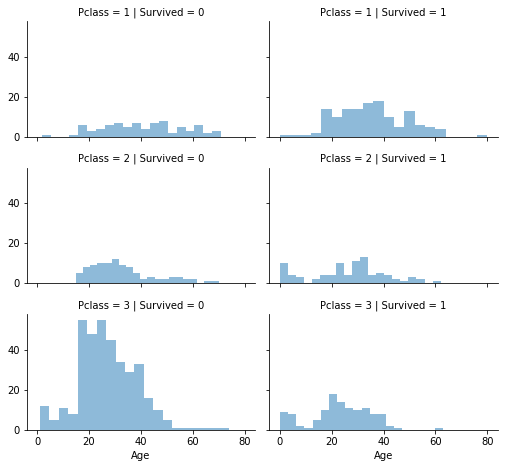

In [15]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

**Observations:**
* Pclass is correlated with survival
* In general, 1st had the highest chance, followed by 2nd class, and 3rd class had the lowest chance of survival.

### SibSp and Parch

SibSp and Parch would make sense as a combined feature, showing the number of relatives a person has on the Titanic. I can create this and then observe how the feature of relatives impacts the probability of survival.

In [16]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

C:\Users\murrayl\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


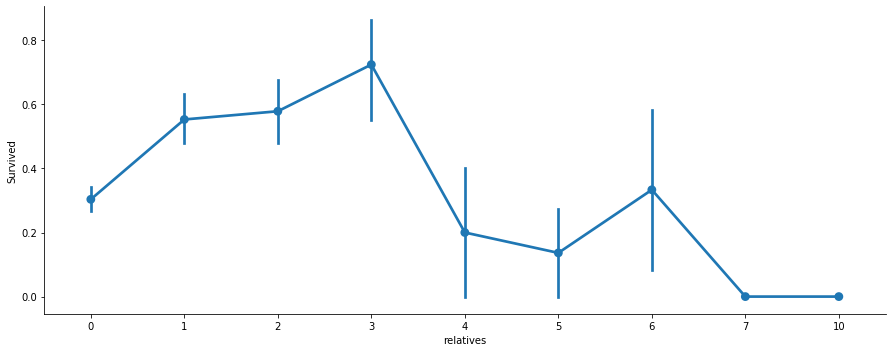

In [17]:
axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, )

**Observations:**
* Probability of survival was highest with 1-3 relatives.
* Proability of survival was low if you had less than 1 relative or more than 3 in general.

# Preparing to Conduct the Logistic Regression

In order to run my logistic regression, I  need to convert several features. The Fare featured is a float and needed to be changed to an integer. The Sex and Embarked features are categorical and need to be adjusted to be numeric. Because there are 681 unique tickets in the Ticket feature, I will drop from the dataset. And finally, I will use the Name feature to extract the Titles from the Name, so that I can  build a new feature that converts titles into numbers.

### Converting Features

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
relatives      891 non-null int64
not_alone      891 non-null int32
dtypes: float64(1), int32(2), int64(6), object(4)
memory usage: 83.6+ KB


**Age:** I converted Fare from float to int64.

In [19]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

**Sex:** I converted Sex to be numeric with male = 0 and female = 1.

In [20]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

**Ticket:** I decided to drop this feature from the dataset.

In [21]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

**Embarked:** I converted Embarked to be numeric with S = 0, C = 1, and Q = 2.

In [22]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

**Name:** I converted Name to be numeric with Null = 0, Mr = 1, Miss = 2, Mrs = 3, Master = 4, and Rare = 5.

In [23]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [24]:
# Glancing at the converted features again
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null int32
Embarked       891 non-null int64
relatives      891 non-null int64
not_alone      891 non-null int32
Title          891 non-null int64
dtypes: int32(3), int64(9)
memory usage: 73.2 KB


In [25]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,1,0,3,0,22,1,0,7,0,1,0,1
1,2,1,1,1,38,1,0,71,1,1,0,3
2,3,1,3,1,26,0,0,7,0,0,1,2
3,4,1,1,1,35,1,0,53,0,1,0,3
4,5,0,3,0,35,0,0,8,0,0,1,1


# Performing the Logistic Regression

I am now ready to utilize scikit-learn logistic regression to train, test and predict the categorical target variable of whether or not a passenger survived. Because Kaggle does not provide labels for their testing-set, we need to use the predictions on the training set.

**1. I will contain all the features in X and the target variable will be in Y.**

In [26]:
X = train_df.drop("Survived",axis=1)
y = train_df["Survived"]

**2. I will use train_test_split from model_selection module to split our data. Thus, 70% of the data will be training data and 30% will be testing data.**

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

**3. I will now use the Logistic Regression to train the model.**

In [28]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\murrayl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

**4. Now I will check the accuracy of the model for predictions.**

In [29]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       154
           1       0.80      0.68      0.74       114

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.79      0.79       268



The weight avg is 79 percent accuracy, which looks pretty good.

**5. Finally, I will check the confusion matrix.**

In [38]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[135,  19],
       [ 36,  78]], dtype=int64)

* True positive: 135 (We predicted a positive result and it was positive)
* True negative: 77 (We predicted a negative result and it was negative)
* False positive: 19 (We predicted a positive result and it was negative)
* False negative: 37 (We predicted a negative result and it was positive)

# Interpration of Performance Measures

### Visaulizing the Confusion Matrix as a Heatmap

Text(0.5, 257.44, 'Predicted label')

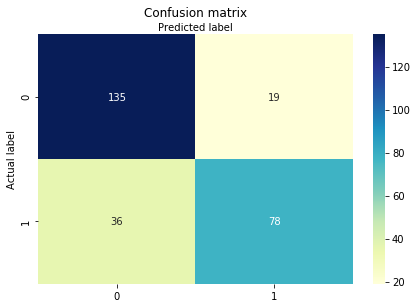

In [31]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# creating the heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.7947761194029851
Precision: 0.8041237113402062
Recall: 0.6842105263157895


### Interpreting the Heatmap Prediction Scores

As explained by Rnuka Joshi in [this blog post](https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/):

**Confusion matrix**: Provides an evalution of a classification model.
* True Positives (TP) - if actual class value indicates the passenger survived and predicted class tells you the passenger survived.
* True Negatives (TN) - if actual class value indicates the passenger did not survive and predicted class tells you the passenger did not survive.
* False Positives (FP) – if actual class says indicates the passenger did not survive but predicted class tells you the passanger passenger did survive.
* False Negatives (FN) – if actual class value indicates the passenger survived and predicted class tells you that passenger did not survive.

**Accuracy:** Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.
* Accuracy = TP+TN/TP+FP+FN+TN

**Precision:** Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate.
* Precision = TP/TP+FP

**Recall (Sensitivity):** Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label?
* Recall = TP/TP+FN

**F1 Score:** F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.
* F1 Score = 2*(Recall * Precision) / (Recall + Precision)

**Conclusions:**
* Accuracy was 79% which is relatively high.
* Precision was 80%, which is relatively high and relates to the low false positive rate. It says that of all passengers classified as survived, 81% actually survived.
* Recall indicates that if there are Titanic passengers that survived in the test set, the Logistic Regression model can identify it 67% of the time, which is good for this model as it is above 50%.
* F1 Score is 0.83 for died and 0.73 for survived.

### Receiver Operating Characteristic (ROC) Curve

This curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

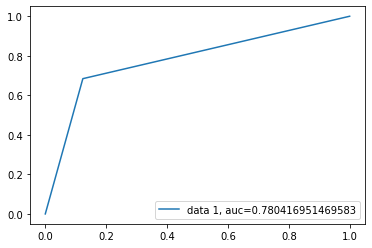

In [33]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)
auc = metrics.roc_auc_score(y_test, predictions)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.77. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier. Thus, our model is a relatively good classifier.

# Comparing the One-vs-All Classification to One-vs-One

"Say we have a classification problem and there are N distinct classes. In this case, we’ll have to train a multi-class classifier instead of a binary one. One-vs-all classification is a method which involves training N distinct binary classifiers, each designed for recognizing a particular class." - [Utku's Blog](https://utkuufuk.com/2018/06/03/one-vs-all-classification/)

In [34]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,1,0,3,0,22,1,0,7,0,1,0,1
1,2,1,1,1,38,1,0,71,1,1,0,3
2,3,1,3,1,26,0,0,7,0,0,1,2
3,4,1,1,1,35,1,0,53,0,1,0,3
4,5,0,3,0,35,0,0,8,0,0,1,1


In [35]:
train_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.567901,0.523008,0.381594,31.785634,0.361392,0.904602,0.602694,1.728395
std,257.353842,0.486592,0.836071,0.477990,13.514397,1.102743,0.806057,49.703730,0.635673,1.613459,0.489615,1.030039
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,14.000000,0.000000,0.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.000000,2.000000,10.000000,1.000000,5.000000


In [40]:
############################################
#
# Analyze titanic data using multiple classes
#    
############################################

# Make data (X) and target (y), leaving off last row
X = train_df.iloc[:-1,:11]  
y = train_df.iloc[:-1,11]
  
 
# Fit a model 
  
logmodel.fit(X,y)

# Get score for prediciting the last row (the one left out)
logmodel.score( train_df.iloc[-1,:11].values.reshape(1,-1), train_df.iloc[-1,11].reshape(-1,1) )


# Show predicted vs actual class for last row (left out row)
print( 'Predicted class %s, real class %s' % (logmodel.predict(train_df.iloc[-1,:11].values.reshape(1,-1)),train_df.iloc[-1,11]) )

# Show probabilities for each class (for the last row again)
print( 'Probabilities for each class from 0 to 2: %s' % logmodel.predict_proba(train_df.iloc[-1,:11].values.reshape(1,-1) ) )

Predicted class [1], real class 1
Probabilities for each class from 0 to 2: [[9.61391170e-01 1.15796213e-02 7.99751766e-04 1.00169384e-03
  2.52277631e-02]]


C:\Users\murrayl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\murrayl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [36]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

X, y = train_df.iloc[:445,:11], train_df.iloc[:445,11]
tX, ty = train_df.iloc[445:,:11], train_df.iloc[445:,11]

OVR = OneVsRestClassifier(logmodel).fit(X_train,y_train)
OVO = OneVsOneClassifier(logmodel).fit(X_train,y_train)

print( 'One vs rest accuracy: %.3f' % OVR.score(tX,ty) )
print( 'One vs one accuracy: %.3f' % OVO.score(tX,ty) )

One vs rest accuracy: 0.545
One vs one accuracy: 0.545


C:\Users\murrayl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\murrayl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
LR = LogisticRegression()
LR.fit(X,y)
print( 'One vs rest accuracy: %.3f' % LR.score(tX,ty) )

One vs rest accuracy: 0.879


C:\Users\murrayl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\murrayl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
